<a href="https://colab.research.google.com/github/cheungkelly/DATA_301/blob/main/Day_15_Model_Section_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection and Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np

## Ames Housing Data

As usual, we'll try to predict SalePrice using a mix of quantitative and categorical features. What's the best model we can come up with?

See the [data documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for all the variables that are available in the data set. We'll try to come up with a model that minimizes test error, measured by root mean square error (RMSE).

In [ ]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

1\. Recall that in a previous notebook we fit a 10-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**. But what about other sets of features?

Specify 5 sets of features to investigate. These sets could be subsets of the variables above, but you can also include other variables from the data set. The choice is up to you, but try to guess which sets might lead to good models based on your intuition and what we have already seen for this data set.

For each set of features, fit a 10-nearest neighbors regression model and estimate its test error (RMSE) using cross-validation. You can write a loop to iterate over the sets of features similar to what was done in the Model Selection section of the pre-class notebook.

In Discord, report your lowest RMSE and the corresponding features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df_ames_train = df_ames.loc[:1465].copy()
# df_ames_train["log(SalePrice)"] = np.log(df_ames_train["SalePrice"])

# define function to calculate estimate of test error for a given feature set
def get_cv_error(features):
  # define pipeline
  pipeline = make_pipeline(
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=10)
  )
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=df_ames_train[features].fillna(df_ames_train[features].mean()),
                             y=df_ames_train["SalePrice"],
                             scoring="neg_root_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

# calculate and store errors for different feature sets
errs = pd.Series()
for features in [["Lot Area", "Pool Area"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF", "Garage Cars"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars"]]:
  errs[str(features)] = get_cv_error(features)

errs


<ipython-input-5-8eed97cfac45>:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  errs = pd.Series()


['Lot Area', 'Pool Area']                                                     73458.684249
['Lot Area', 'Pool Area', 'Total Bsmt SF']                                    54554.492053
['Lot Area', 'Pool Area', 'Total Bsmt SF', 'TotRms AbvGrd']                   48530.397856
['Lot Area', 'Pool Area', 'Total Bsmt SF', 'Garage Cars']                     44072.117938
['Lot Area', 'Pool Area', 'Total Bsmt SF', 'TotRms AbvGrd', 'Garage Cars']    40821.402288
dtype: float64

2\. Recall that in a previous notebook we fit a $k$-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**. Previously we used a loop to iterate and find the value of $k$ with the smallest test error (RMSE).

Now use grid search in scikit-learn to implement this process. Use the results to create a plot of test error versus $k$.

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train = df_ames_train[["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars"]]
y_train = df_ames_train["SalePrice"]

# define pipeline
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 20)
                           },
                           scoring="neg_root_mean_squared_error",
                           cv=10)
grid_search.fit(X_train.fillna(X_train.mean()), y_train)
grid_search.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=19))])

In [ ]:
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018855,0.003255,0.012323,0.009163,1,{'kneighborsregressor__n_neighbors': 1},-42211.521553,-41997.756686,-53509.837049,-59431.399535,-50557.940212,-41897.856712,-49389.851684,-60200.030833,-49003.674717,-45367.853254,-49356.772224,6439.312920,19
1,0.016158,0.006249,0.009348,0.005007,2,{'kneighborsregressor__n_neighbors': 2},-39647.331077,-38886.627358,-47928.958465,-50392.682256,-52675.019703,-36355.716649,-42456.829200,-53098.449174,-45349.544760,-40034.989860,-44682.614850,5771.763526,18
2,0.015986,0.006915,0.012804,0.005427,3,{'kneighborsregressor__n_neighbors': 3},-42086.429486,-36757.987386,-49473.087633,-48530.343471,-52066.518346,-35674.602964,-38790.187008,-48040.109483,-44953.955050,-35954.712436,-43232.793326,5866.714673,17
3,0.013826,0.008286,0.009605,0.004129,4,{'kneighborsregressor__n_neighbors': 4},-40911.113756,-36177.694035,-48953.033750,-47692.139262,-53729.162531,-35722.671406,-36507.416601,-45880.870461,-44858.220145,-34429.404409,-42486.172636,6333.699435,16
4,0.014287,0.008916,0.013215,0.007825,5,{'kneighborsregressor__n_neighbors': 5},-42392.059994,-36648.916387,-48243.807206,-44973.630643,-51422.932094,-34604.265288,-36311.450369,-44522.553139,-45403.340284,-34866.025084,-41938.898049,5668.031542,15
5,0.014939,0.008057,0.014768,0.006500,6,{'kneighborsregressor__n_neighbors': 6},-40486.080952,-36668.198089,-49657.808802,-42091.502373,-50476.698627,-34669.591609,-35530.703998,-44178.715534,-44485.050101,-34001.748815,-41224.609890,5706.956874,14
6,0.017228,0.005653,0.012563,0.005590,7,{'kneighborsregressor__n_neighbors': 7},-41869.819527,-37668.760465,-49557.565740,-42023.365854,-48954.951218,-33311.461609,-35214.033430,-44221.923500,-43968.155941,-33740.834843,-41053.087213,5602.350128,12
7,0.020859,0.017052,0.014129,0.009015,8,{'kneighborsregressor__n_neighbors': 8},-41478.006332,-37443.381106,-50215.998025,-41854.076825,-48627.525033,-32521.438114,-35529.548675,-43432.833414,-44128.009114,-33519.056345,-40874.987298,5744.949416,6
8,0.017753,0.008628,0.013484,0.008702,9,{'kneighborsregressor__n_neighbors': 9},-41620.786284,-36356.129737,-50921.340576,-42164.905340,-48453.881861,-32156.975959,-36694.837175,-45041.868936,-44970.245136,-32859.260807,-41124.023181,6101.246872,13
9,0.007612,0.001061,0.006857,0.001689,10,{'kneighborsregressor__n_neighbors': 10},-41824.912036,-36376.483955,-49655.453020,-42112.802272,-47923.216571,-31480.018652,-36684.534838,-45090.093698,-44785.138150,-32281.369689,-40821.402288,6017.877274,3


In [ ]:
df_cv_results_["param_kneighborsregressor__n_neighbors"] = df_cv_results_["param_kneighborsregressor__n_neighbors"].astype(int)

df_cv_results_.set_index("param_kneighborsregressor__n_neighbors", inplace = True)


<Axes: title={'center': 'kNN models with 5 features'}, xlabel='k', ylabel='test error'>

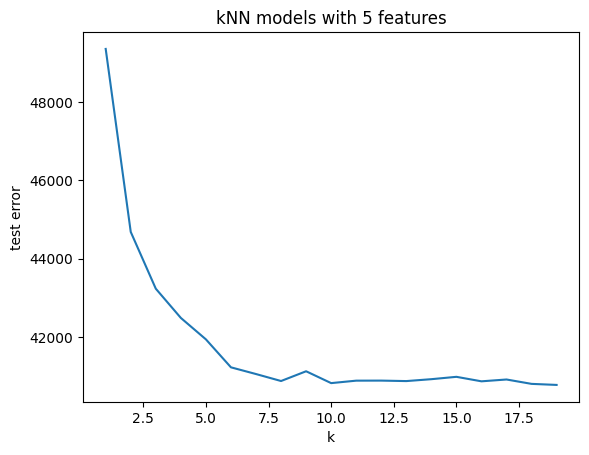

In [ ]:
(-df_cv_results_["mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", title = "kNN models with 5 features")


3\. $k$-nearest neighbors relies on distance and we know there are different distance metrics. Repeat the previous part and use grid search to iterate over both (1) `n_neighbors` and (2) `metric`, which can be `"euclidean"` or `"manhattan"`. Compare the results to the previous part. (Hint: recall the note in the pre-class notebook about grid search conventions for refering to steps in the pipeline.)

In [ ]:
grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 20),
                               "kneighborsregressor__metric": ["euclidean", "manhattan"]
                           },
                           scoring="neg_root_mean_squared_error",
                           cv=10)
grid_search.fit(X_train.fillna(X_train.mean()), y_train)
grid_search.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=8))])

In [ ]:
df_cv_results2_ = pd.DataFrame(grid_search.cv_results_)

df_cv_results2_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__metric,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009433,0.003455,0.006384,0.001503,euclidean,1,"{'kneighborsregressor__metric': 'euclidean', '...",-42211.521553,-41997.756686,-53509.837049,-59431.399535,-50557.940212,-41897.856712,-49389.851684,-60200.030833,-49003.674717,-45367.853254,-49356.772224,6439.312920,38
1,0.016977,0.009361,0.008948,0.003973,euclidean,2,"{'kneighborsregressor__metric': 'euclidean', '...",-39647.331077,-38886.627358,-47928.958465,-50392.682256,-52675.019703,-36355.716649,-42456.829200,-53098.449174,-45349.544760,-40034.989860,-44682.614850,5771.763526,36
2,0.009854,0.004942,0.008572,0.006243,euclidean,3,"{'kneighborsregressor__metric': 'euclidean', '...",-42086.429486,-36757.987386,-49473.087633,-48530.343471,-52066.518346,-35674.602964,-38790.187008,-48040.109483,-44953.955050,-35954.712436,-43232.793326,5866.714673,34
3,0.011481,0.006928,0.008364,0.003973,euclidean,4,"{'kneighborsregressor__metric': 'euclidean', '...",-40911.113756,-36177.694035,-48953.033750,-47692.139262,-53729.162531,-35722.671406,-36507.416601,-45880.870461,-44858.220145,-34429.404409,-42486.172636,6333.699435,33
4,0.009850,0.006061,0.007066,0.002137,euclidean,5,"{'kneighborsregressor__metric': 'euclidean', '...",-42392.059994,-36648.916387,-48243.807206,-44973.630643,-51422.932094,-34604.265288,-36311.450369,-44522.553139,-45403.340284,-34866.025084,-41938.898049,5668.031542,32
5,0.007719,0.002218,0.006644,0.001855,euclidean,6,"{'kneighborsregressor__metric': 'euclidean', '...",-40486.080952,-36668.198089,-49657.808802,-42091.502373,-50476.698627,-34669.591609,-35530.703998,-44178.715534,-44485.050101,-34001.748815,-41224.609890,5706.956874,30
6,0.014210,0.007518,0.013796,0.010343,euclidean,7,"{'kneighborsregressor__metric': 'euclidean', '...",-41869.819527,-37668.760465,-49557.565740,-42023.365854,-48954.951218,-33311.461609,-35214.033430,-44221.923500,-43968.155941,-33740.834843,-41053.087213,5602.350128,27
7,0.008236,0.002684,0.005957,0.000509,euclidean,8,"{'kneighborsregressor__metric': 'euclidean', '...",-41478.006332,-37443.381106,-50215.998025,-41854.076825,-48627.525033,-32521.438114,-35529.548675,-43432.833414,-44128.009114,-33519.056345,-40874.987298,5744.949416,21
8,0.008383,0.002892,0.005937,0.000477,euclidean,9,"{'kneighborsregressor__metric': 'euclidean', '...",-41620.786284,-36356.129737,-50921.340576,-42164.905340,-48453.881861,-32156.975959,-36694.837175,-45041.868936,-44970.245136,-32859.260807,-41124.023181,6101.246872,28
9,0.009070,0.004106,0.007207,0.003130,euclidean,10,"{'kneighborsregressor__metric': 'euclidean', '...",-41824.912036,-36376.483955,-49655.453020,-42112.802272,-47923.216571,-31480.018652,-36684.534838,-45090.093698,-44785.138150,-32281.369689,-40821.402288,6017.877274,18


In [ ]:
df_cv_results2_["param_kneighborsregressor__n_neighbors"] = df_cv_results2_["param_kneighborsregressor__n_neighbors"].astype(int)

df_cv_results2_.set_index("param_kneighborsregressor__n_neighbors", inplace = True)


param_kneighborsregressor__metric
euclidean    Axes(0.125,0.11;0.775x0.77)
manhattan    Axes(0.125,0.11;0.775x0.77)
Name: pos_mean_test_score, dtype: object

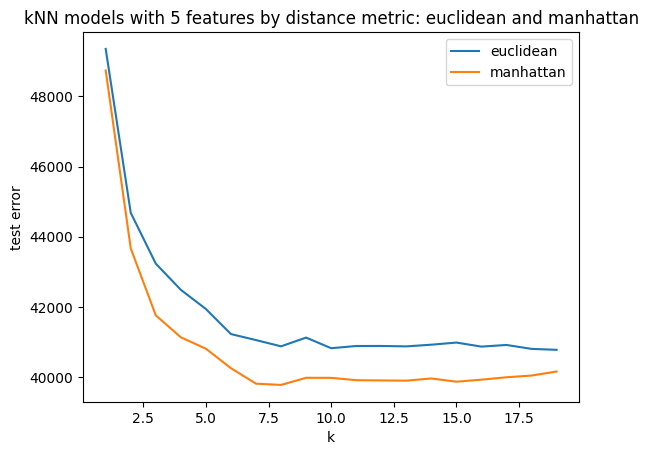

In [ ]:
# kNN models with 5 features by distance metric: euclidean and manhattan

df_cv_results2_["pos_mean_test_score"] = -df_cv_results2_["mean_test_score"]

(df_cv_results2_.groupby("param_kneighborsregressor__metric")["pos_mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error",
                                                                                                title = "kNN models with 5 features by distance metric: euclidean and manhattan",
                                                                                                legend = True)

4\. Combine elements of the previous parts and fit what you think will be the best $k$-nearest neighbors model. Specify which features you are using, the value of $k$, and the distance metric. (There are other elements like scaling that are welcome to investigate too.) Estimate the test error.

In [ ]:

pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=8,
                        metric="manhattan")
)
# calculate errors from cross-validation
cv_errs = -cross_val_score(pipeline, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)
# calculate average of the cross-validation errors
cv_errs.mean()


39774.23742538022

5\. Now fit a linear regression model using the same features that you used in the previous part. Estimate the test error. How does the test error for linear regression compare to the kNN model?


In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

cv_errs = -cross_val_score(pipeline, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()


45365.84605381213

6\. In Discord, describe your model that resulted in your lowest MSE: features, method (linear or kNN), value of $k$ if applicable, etc. What was the test error?

**The model that resulted in the lowest mean square error is KNN model with manhattan distance and k = 8.**